In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

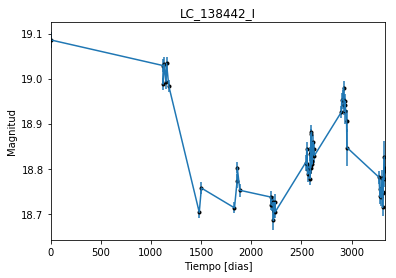

In [3]:
data = np.genfromtxt('LC_138442_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_138442_I')
plt.savefig("LC_138442_I.pdf")

In [4]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [5]:
%%capture capt
sample = model.run_mcmc(20000)

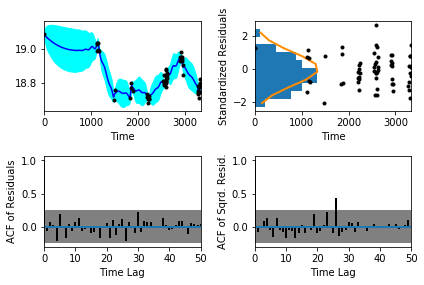

In [6]:
sample.assess_fit()

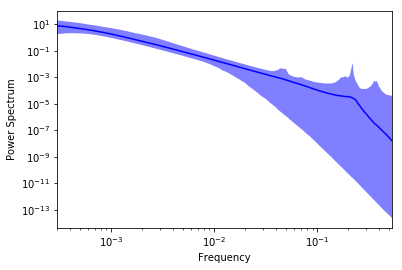

In [7]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [8]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

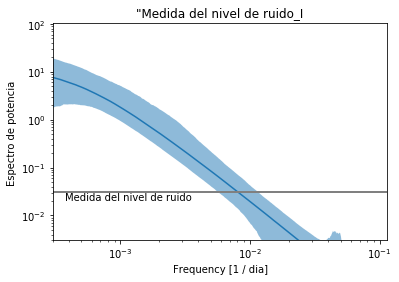

In [9]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_138442_I')
plt.title('"Medida del nivel de ruido_I')
plt.savefig("Medida del nivel de ruido_I.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_138442_I')

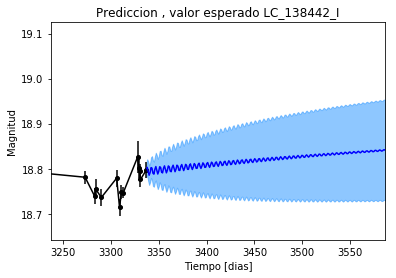

In [10]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_138442_I')

Text(0.5,1,'Prediccion, Caminos simulados  LC_138442_I')

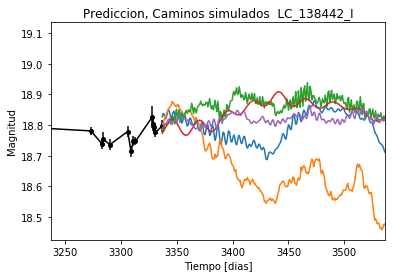

In [11]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_138442_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


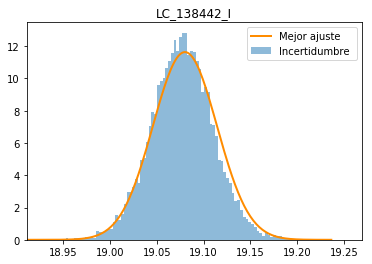

In [12]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_138442_I')
plt.savefig("Mejor_ajuste_LC_138442_I.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_138442_I')

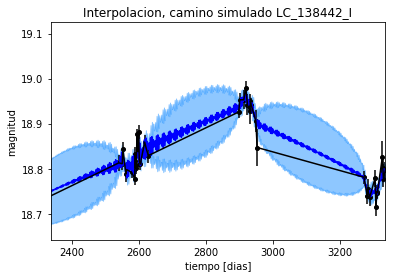

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_138442_I')

Text(0.5,1,'Interpolacion, camino simulado LC_138442_I')

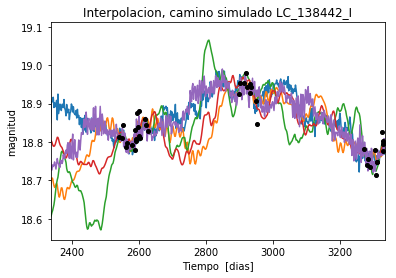

In [14]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_138442_I')

In [15]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [16]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 386.713501106
Median: 0.0106276154369
Standard deviation: 0.159609211844
68% credibility interval: [ 0.00110669  0.09200027]
95% credibility interval: [  3.89980925e-04   6.38414747e-01]
99% credibility interval: [  3.10508435e-04   9.92133191e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 469.114800031
Median: 0.00847401419254
Standard deviation: 0.105748150255
68% credibility interval: [ 0.00091449  0.06064797]
95% credibility interval: [  3.59008031e-04   3.61692142e-01]
99% credibility interval: [  3.10508435e-04   7.35905613e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 551.19941794
Median: 0.0898496626575
S

In [17]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 332.706183055
Median: 151.780280831
Standard deviation: 2.57459144247
68% credibility interval: [ 149.08816737  154.19677674]
95% credibility interval: [ 146.04693231  156.19231889]
99% credibility interval: [ 143.89340009  157.0704104 ]


In [18]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 203.618016403
Median: 1.0201098756
Standard deviation: 2.43946531566
68% credibility interval: [ 0.19845628  4.58299681]
95% credibility interval: [ 0.04564607  8.18179408]
99% credibility interval: [  0.01977852  12.00861315]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 708.769801614
Median: 2.51065024417
Standard deviation: 12.3395204857
68% credibility interval: [  0.28776291  19.42147909]
95% credibility interval: [  3.09459855e-

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 11926.7946126
Median: 5.87477095098e-33
Standard deviation: 1.69725896036e+51
68% credibility interval: [  2.55168080e-72   4.28122921e-14]
95% credibility interval: [  3.69145951e-153   2.26017789e+030]
99% credibility interval: [  3.74610436e-159   1.35769738e+033]


In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1041.26571664
Median: 18.8740279159
Standard deviation: 0.0642721755476
68% credibility interval: [ 18.81824827  18.93743633]
95% credibility interval: [ 18.75599615  19.01325991]
99% credibility interval: [ 18.70450263  19.07775194]


In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 233.718166619
Median: 0.220549173311
Standard deviation: 0.270870856069
68% credibility interval: [ 0.04799833  0.643522  ]
95% credibility interval: [ 0.          0.94591399]
99% credibility interval: [ 0.          1.03764013]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 233.718166619
Median: 0.220549173311
Standard deviation: 0.270870856069
68% credibility interval: [ 0.04799833  0.643522  ]
95% credibility interval: [ 0.          0.94591399]
99% credibility interval: [ 0.          1.03764013]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1882.15298763
Median: 0.0
Standard deviation: 0.000256190845973
68% cred

In [22]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 332.706183055
Median: 151.780280831
Standard deviation: 2.57459144247
68% credibility interval: [ 149.08816737  154.19677674]
95% credibility interval: [ 146.04693231  156.19231889]
99% credibility interval: [ 143.89340009  157.0704104 ]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 995.475238686
Median: 0.0158171835304
Standard deviation: 0.00912897866779
68% credibility interval: [ 0.0108765  0.0237785]
95% credibility interval: [ 0.00800553  0.03795908]
99% credibility interval: [ 0.00639775  0.06222783]


In [24]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 438.777673519
Median: 1.16052318765
Standard deviation: 0.263496585908
68% credibility interval: [ 0.92235668  1.46074596]
95% credibility interval: [ 0.75303921  1.7723676 ]
99% credibility interval: [ 0.67107408  1.91634818]


In [25]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 248.401913854
Median: 0.011340595454
Standard deviation: 0.277104396005
68% credibility interval: [  1.62457315e-04   2.01747739e-01]
95% credibility interval: [  6.90022452e-33   9.99054085e-01]
99% credibility interval: [  1.05080799e-36   1.67244632e+00]


In [26]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 386.713501106
Median: (-0.0667752771637-1.45656112582j)
Standard deviation: 1.97542108175
68% credibility interval: [-0.57805476-1.13282509j -0.00695356-0.38111005j]
95% credibility interval: [ -4.01127816e+00-0.12482144j  -2.45032242e-03-4.05843415j]
99% credibility interval: [ -6.23375669e+00+0.j          -1.95098204e-03-4.08112953j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 469.114800031
Median: (-0.0532438014674+1.34769252002j)
Standard deviation: 1.82703200869
68% credibility interval: [-0.38106243+3.42247667j -0.00574590+4.03328095j]
95% credibility interval: [ -2.27257875e+00+1.87589508j  -2.25571399e-03+1.79624803j]
99% credibility interval: [ -4.62383134e+00+1.60175493j  -1.95098204e-03+4.08112953j]
Post